# Customer Churn Analysis

## Problem Statement

#### 
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

### Importing Libraries

In [198]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import skew

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [199]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\3rd week\Telecom_customer_churn.csv') 

In [200]:
df.head() # to display top 5 rows from dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [201]:
print('Total no of rows & columns: ',df.shape) # to display number of rows & columns

Total no of rows & columns:  (7043, 21)


In [202]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [203]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Total Charges datatype shown is false

In [204]:
# converting 'Total Charges' datatype from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [205]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [206]:
# to list continous features in our dataset
con_features=[i for i in df.columns if df.dtypes[i]=='int64' or df.dtypes[i]=='float64']
con_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [207]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


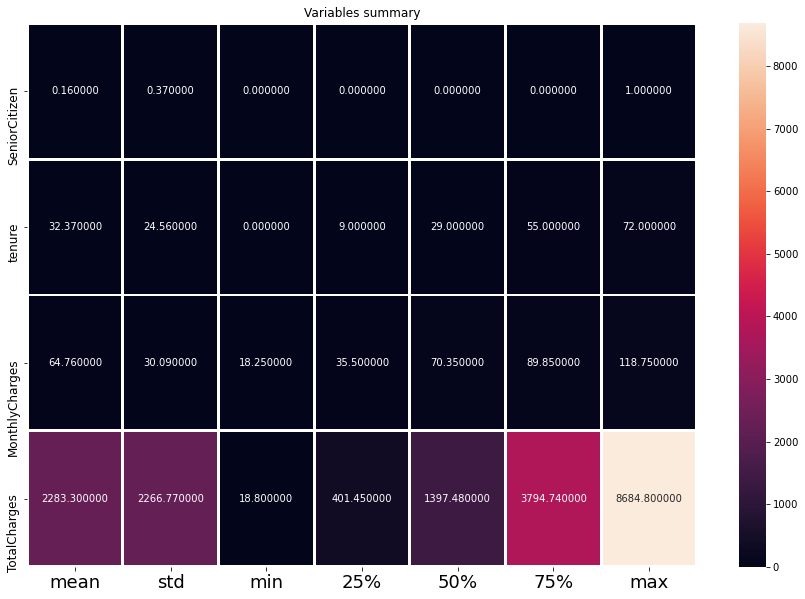

In [208]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of above columns. It helps us further in data cleaning.

In [209]:
df.isnull().sum()  # to check null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [210]:
# to fill null values
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [211]:
df.isnull().sum()  # to check null values again

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No null values in the dataset

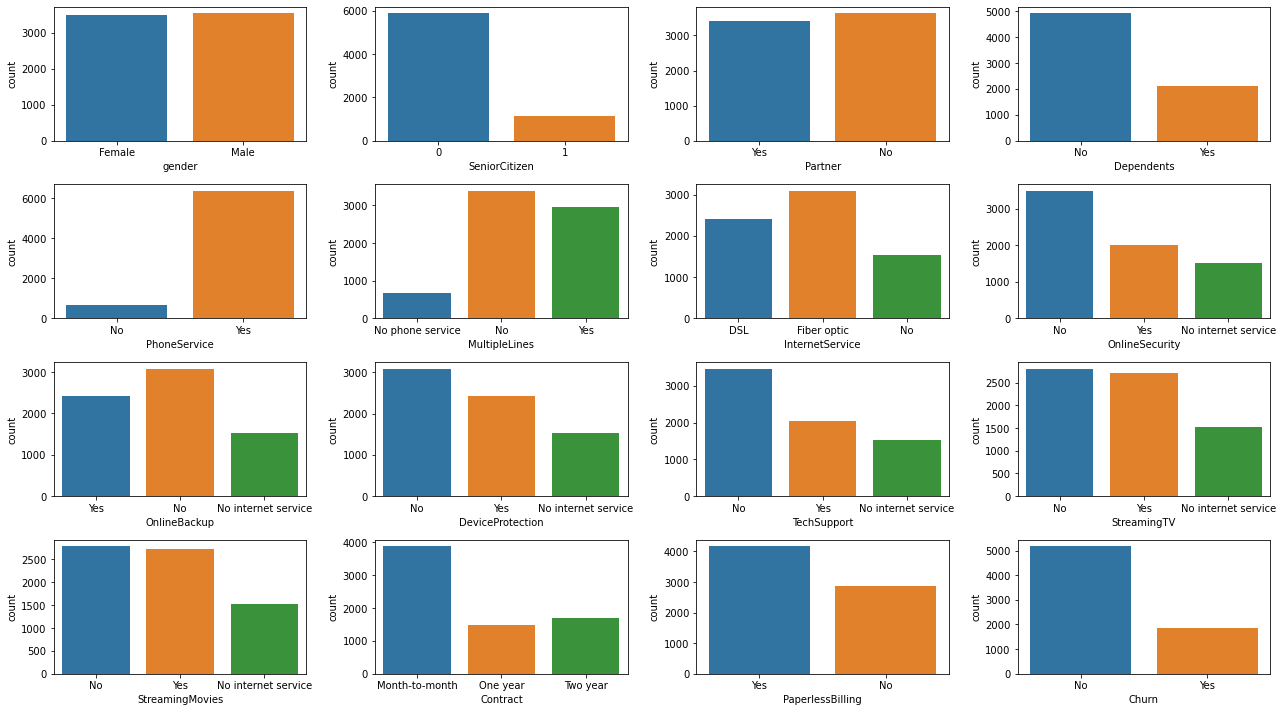

In [212]:
# Univariate Analysis
fig,ax = plt.subplots(4,4,figsize=(18,10))

sns.countplot('gender',data=df,ax=ax[0][0])
sns.countplot('SeniorCitizen',data=df,ax=ax[0][1])
sns.countplot('Partner',data=df,ax=ax[0][2])
sns.countplot('Dependents',data=df,ax=ax[0][3])

sns.countplot('PhoneService',data=df,ax=ax[1][0])
sns.countplot('MultipleLines',data=df,ax=ax[1][1])
sns.countplot('InternetService',data=df,ax=ax[1][2])
sns.countplot('OnlineSecurity',data=df,ax=ax[1][3])

sns.countplot('OnlineBackup',data=df,ax=ax[2][0])
sns.countplot('DeviceProtection',data=df,ax=ax[2][1])
sns.countplot('TechSupport',data=df,ax=ax[2][2])
sns.countplot('StreamingTV',data=df,ax=ax[2][3])

sns.countplot('StreamingMovies',data=df,ax=ax[3][0])
sns.countplot('Contract',data=df,ax=ax[3][1])
sns.countplot('PaperlessBilling',data=df,ax=ax[3][2])
sns.countplot('Churn',data=df,ax=ax[3][3])

plt.tight_layout()

#### Inferences from above plot

1. Count of male customers is approximately same to female customers.

2. Only 16% customers are there who are senior citizen.

3. Customers having partners or not is approximately same.

4. Customers having dependents is half to that of not having.

5. 90% customers have phone service.

6. Customers having multiple line connections is 42%. 

7. 44% customers have fiber optic connection and 34% have DSL connection for internet.

8. Lots of customers online security is at risk as count of no is more than yes.

9. Customers not having online backup is more than having backup.

10. For security, customers having device protection is 34%.

11. Lots of customers does not have tech support.

12. Customers streaming and not streaming TV is approximately equal.

13. Customers streaming and not streaming movies is approximately equal.

14. 55% customers have opted for monthly subscription plan, 24% for one year and 21% for two years.

15. Count of customers doing online payments is more.

16. 73% customers did not change their service provider.

In [213]:
# dropping column as its just an identifier
df=df.drop(columns='customerID')

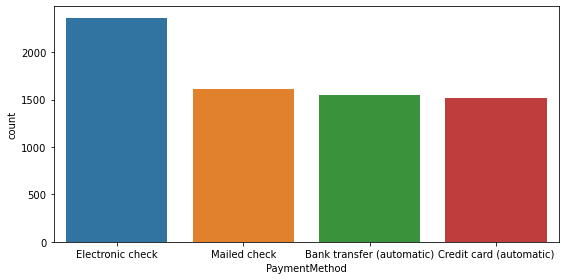

In [214]:
plt.figure(figsize=(8,4))
sns.countplot(df['PaymentMethod'])  # Lets visualize the PaymentMethod column 
plt.tight_layout()

#### Customers using different modes of payments are :

     Electronic check - 33%
     Mailed check - 23%
     Bank transfer (automatic) & Credit card (automatic)- 22% (both)

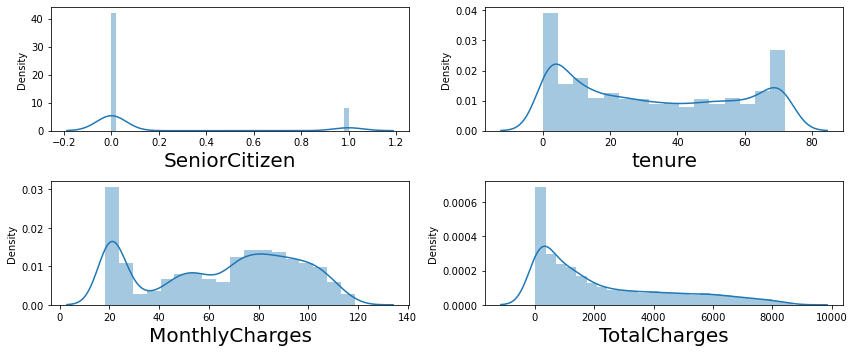

In [215]:
# lets visualize how data is distributed in every continous column 
plt.figure(figsize=(12,5), facecolor='white')
plotnumber=1
for column in df[con_features]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Skewness can be seen mostly for TotalCharges

In [216]:
# removing the skewness using quantile method
q = df['TotalCharges'].quantile(0.95)
# removing the top 5% data from the TotalCharges column
df= df[df['TotalCharges']<q]

<AxesSubplot:xlabel='InternetService', ylabel='count'>

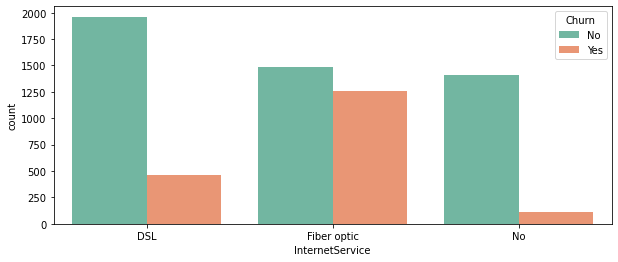

In [217]:
# to visualize Internet_Service vs Churn
plt.subplots(figsize=(10,4))
sns.countplot(x='InternetService',hue='Churn',data=df, palette='Set2')

#### Lots of customers using fibre optic for internet service has discontinued their service.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

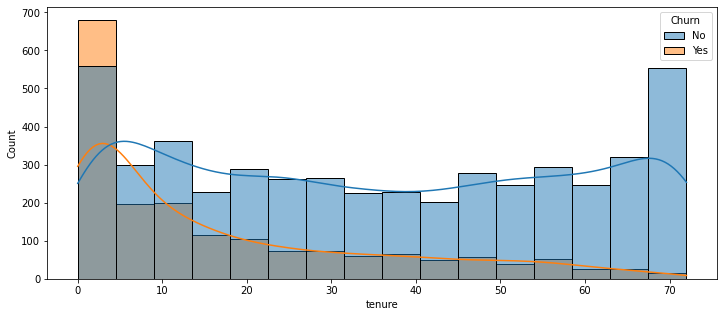

In [218]:
# to visualize tenure vs Churn
plt.figure(figsize=(12,5))
sns.histplot(x='tenure',hue='Churn',data=df,kde=True)

#### 
If customer is using company service for a long period of time, then chances of churn is very less.

Customer churn can be seen most at the starting month.

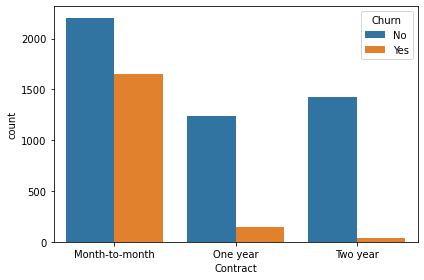

In [219]:
sns.countplot(x='Contract',hue='Churn',data=df)
plt.tight_layout()

#### Customer churn is very less if subscription plan is opted for one and two years. 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

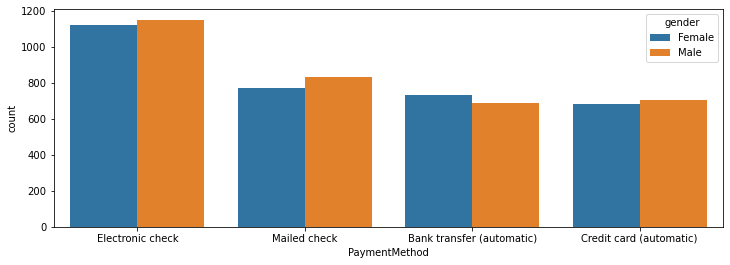

In [220]:
plt.subplots(figsize=(12,4))
sns.countplot(x='PaymentMethod', hue='gender', data=df)

#### For payment, electronic check has been widely used by both gender.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

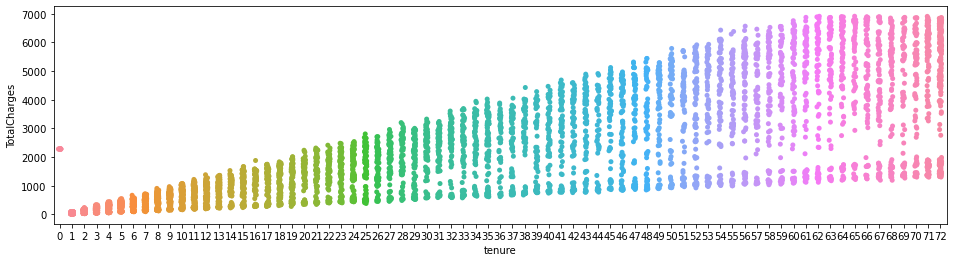

In [221]:
plt.subplots(figsize=(16,4))
sns.stripplot(x='tenure',y='TotalCharges',data=df)

#### If using service for a long period of time, then total charges for services increases.

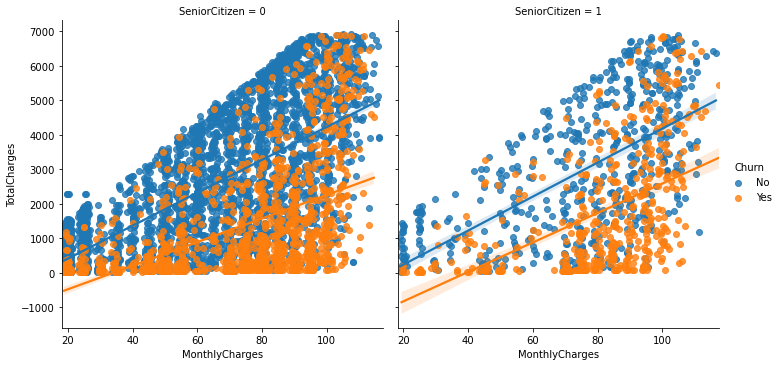

In [222]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", col="SeniorCitizen", hue="Churn",data=df)

#### In case of senior citizen paying monthly charges for the services, the chances of churn is very less as compared to youth & adults.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

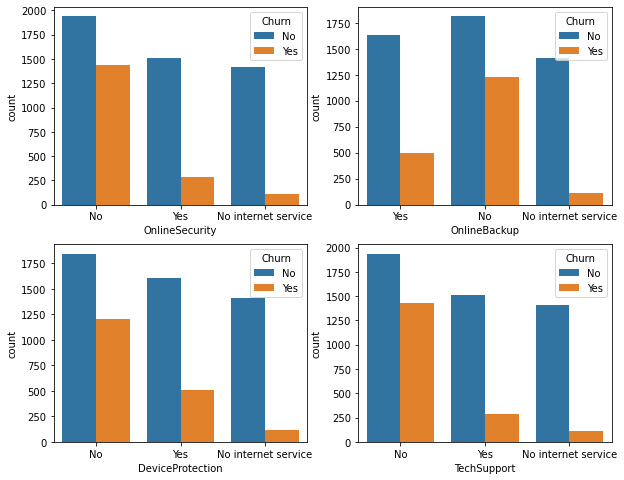

In [223]:
# to visualize 
fig,ax = plt.subplots(2,2,figsize=(10,8))

sns.countplot('OnlineSecurity',data=df,hue='Churn',ax=ax[0][0])
sns.countplot('OnlineBackup',data=df,hue='Churn',ax=ax[0][1])
sns.countplot('DeviceProtection',data=df,hue='Churn',ax=ax[1][0])
sns.countplot('TechSupport',data=df,hue='Churn',ax=ax[1][1])

#### Customers not having online security,online backup,Device protection and Tech Support is most likely to churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

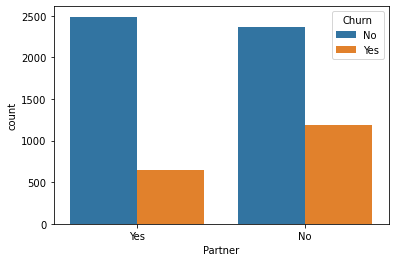

In [224]:
sns.countplot(x='Partner', hue='Churn',data=df)

#### Customers having partners are less likely to churn.

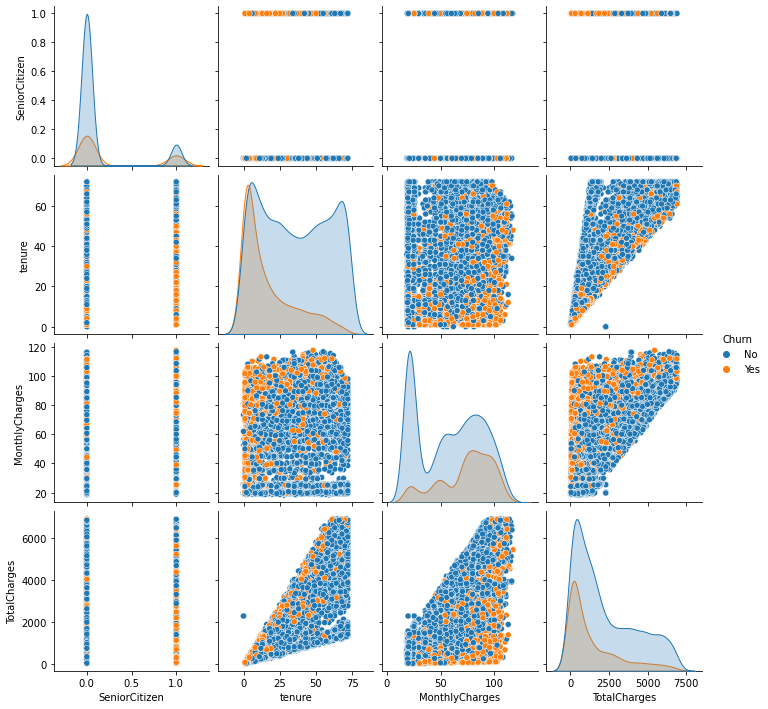

In [225]:
# to visualize relationship between numerical features and target variable
sns.pairplot(data=df, hue="Churn")

In [226]:
from sklearn.preprocessing import LabelEncoder

In [227]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
         'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

In [228]:
# checking if all features converted into machine language
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


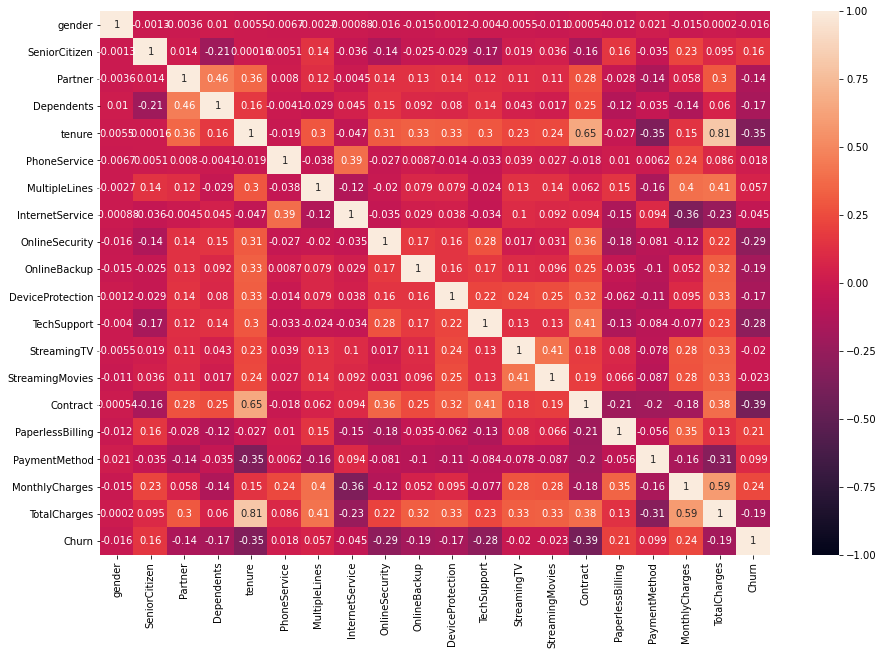

In [229]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Only MonthlyCharges and Paperless billing is showing positive relationship with target/label variable.

In [230]:
# to see skewness for every continous column stored in con_datanew
for col in con_features:
    print(col)
    print(skew(df[col]))

SeniorCitizen
1.875334082112081
tenure
0.322643870940065
MonthlyCharges
-0.21126878332831345
TotalCharges
0.9197463820006637


In [231]:
# Applying Log Transformation to remove skewness
df['TotalCharges'] = np.log(df['TotalCharges'])

In [232]:
y = df['Churn']
X = df.drop('Churn', axis = 1)

In [233]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [234]:
X_scaled # to see representation of X_scaled data, how it looks like

array([[-1.00961272, -0.43317922,  1.06648028, ...,  0.36709968,
        -1.12213614, -2.26045564],
       [ 0.99047881, -0.43317922, -0.93766384, ...,  1.30267942,
        -0.18859405,  0.465737  ],
       [ 0.99047881, -0.43317922, -0.93766384, ...,  1.30267942,
        -0.295383  , -1.41435617],
       ...,
       [-1.00961272, -0.43317922,  1.06648028, ...,  0.36709968,
        -1.13074815, -0.64917392],
       [ 0.99047881,  2.30851331,  1.06648028, ...,  1.30267942,
         0.41252438, -0.72948618],
       [ 0.99047881, -0.43317922, -0.93766384, ..., -1.50405981,
         1.48902586,  1.31170426]])

In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.002173,gender
1,1.151677,SeniorCitizen
2,1.452952,Partner
3,1.393666,Dependents
4,5.789378,tenure
5,1.635094,PhoneService
6,1.335847,MultipleLines
7,1.898495,InternetService
8,1.239886,OnlineSecurity
9,1.144868,OnlineBackup


#### Multicollinearity problem exist. Total Charges and tenure are corelated to each other.

In [236]:
# dropping TotalCharges column to remove multicollinearity
df=df.drop(columns='TotalCharges')

In [237]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 101)

## Logistic Regression

In [238]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [239]:
y_pred = log_reg.predict(x_test)

In [240]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7949790794979079

In [241]:
### Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80792227 0.80792227 0.7922272  0.80493274 0.80343797]
0.803288490284006
0.005796926585849137


In [242]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[1088,  121],
       [ 222,  242]], dtype=int64)

In [243]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1209
           1       0.67      0.52      0.59       464

    accuracy                           0.79      1673
   macro avg       0.75      0.71      0.72      1673
weighted avg       0.79      0.79      0.79      1673



## DecisionTreeClassifier

In [244]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 99.78%
______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997268     0.999263  0.997807     0.998265      0.997811
recall        0.999726     0.992679  0.997807     0.996203      0.997807
f1-score      0.998495     0.995960  0.997807     0.997228      0.997805
support    3651.000000  1366.000000  0.997807  5017.000000   5017.000000
______________________________________________
Confusion Matrix:
 [[3650    1]
 [  10 1356]]


===================Test Result======================
Accuracy Score: 72.33%
______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.806240    0.501099  0.723252     0.653669      0.721610
recall        0.812242    0.491379  0.723252     0.651810      0.723252
f1-score      0.809230    0.49

In [245]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.71973094 0.72197309 0.72047833 0.68983558 0.74887892]
0.7201793721973095
0.018697155724207895


## Random Forest Classifier

In [246]:
rand_clf = RandomForestClassifier(random_state=151)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 99.78%
______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997268     0.999263  0.997807     0.998265      0.997811
recall        0.999726     0.992679  0.997807     0.996203      0.997807
f1-score      0.998495     0.995960  0.997807     0.997228      0.997805
support    3651.000000  1366.000000  0.997807  5017.000000   5017.000000
______________________________________________
Confusion Matrix:
 [[3650    1]
 [  10 1356]]


===================Test Result======================
Accuracy Score: 78.66%
______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.819820    0.656891  0.786611     0.738356      0.774632
recall        0.903226    0.482759  0.786611     0.692992      0.786611
f1-score      0.859504    0.55

In [247]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.78475336 0.78998505 0.77130045 0.78998505 0.78923767]
0.785052316890882
0.0071468060316184755


## KNN Classifier

In [248]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 83.32%
______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.869485     0.718776  0.833167     0.794131      0.828451
recall        0.906875     0.636164  0.833167     0.771519      0.833167
f1-score      0.887787     0.674951  0.833167     0.781369      0.829837
support    3651.000000  1366.000000  0.833167  5017.000000   5017.000000
______________________________________________
Confusion Matrix:
 [[3311  340]
 [ 497  869]]


===================Test Result======================
Accuracy Score: 76.03%
______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.822684    0.574822  0.760311     0.698753      0.753940
recall        0.851944    0.521552  0.760311     0.686748      0.760311
f1-score      0.837058    0.54

In [249]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.75336323 0.78699552 0.75336323 0.76158445 0.78624813]
0.7683109118086696
0.015251032515019114


## Support-Vector Machines

In [250]:
svc = SVC(kernel = 'rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 81.96%
______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.840864     0.733064  0.819613     0.786964      0.811513
recall        0.927691     0.530747  0.819613     0.729219      0.819613
f1-score      0.882146     0.615711  0.819613     0.748929      0.809603
support    3651.000000  1366.000000  0.819613  5017.000000   5017.000000
______________________________________________
Confusion Matrix:
 [[3387  264]
 [ 641  725]]


===================Test Result======================
Accuracy Score: 79.32%
______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.817981    0.686709  0.793186     0.752345      0.781573
recall        0.918114    0.467672  0.793186     0.692893      0.793186
f1-score      0.865160    0.55

In [251]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.79671151 0.78251121 0.77055306 0.78251121 0.78849028]
0.7841554559043349
0.008565948449563182


## Gradient Boosting Classifier

In [252]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 82.88%
______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.857033     0.728997  0.828782     0.793015      0.822172
recall        0.917831     0.590776  0.828782     0.754303      0.828782
f1-score      0.886391     0.652649  0.828782     0.769520      0.822749
support    3651.000000  1366.000000  0.828782  5017.000000   5017.000000
______________________________________________
Confusion Matrix:
 [[3351  300]
 [ 559  807]]


===================Test Result======================
Accuracy Score: 80.10%
______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.829819    0.689855  0.800956     0.759837      0.791001
recall        0.911497    0.512931  0.800956     0.712214      0.800956
f1-score      0.868743    0.58

In [253]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.8019432  0.79820628 0.78325859 0.80343797 0.79895366]
0.7971599402092676
0.007209061615418542


## Stochastic Gradient Descent

In [254]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7567244471010162

In [255]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.7264574  0.71898356 0.78923767 0.71898356 0.7264574 ]
0.7360239162929745
0.026815993520584818


## PCA (Principal Component Analysis)

In [256]:
scaler = StandardScaler()
X=df.drop('Churn', axis=1)
X_scaled = scaler.fit_transform(X)

In [257]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-1.85196448e+00, -3.95267200e-01,  2.89661641e+00, ...,
        -1.48343574e+00,  6.52510099e-01, -2.28175155e-01],
       [-6.95891579e-01, -1.49618042e+00,  7.32442309e-01, ...,
         3.86256424e-01, -3.85916861e-02,  1.24002693e-01],
       [-2.10867423e+00, -7.83940767e-01,  9.90981156e-01, ...,
         3.19826794e-04,  5.54938661e-01,  3.22695018e-01],
       ...,
       [-1.14217609e+00, -1.29590453e+00,  3.38271308e+00, ...,
        -2.00007427e-01, -1.02522536e-01, -2.60260376e-01],
       [-2.52893221e+00,  1.38633377e+00,  2.13510273e-01, ...,
        -5.79154928e-01,  5.90272267e-01, -2.69373993e-01],
       [ 2.72369014e+00,  9.34454853e-01, -7.10240505e-01, ...,
         4.45699925e-01, -4.15905287e-01, -8.61805282e-01]])

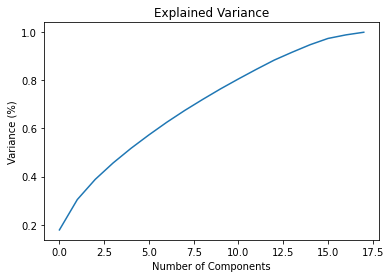

In [258]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

#### we can see that 95% of the variance is being explained by 15 components

In [259]:
pca=PCA(n_components=15)
new_data=pca.fit_transform(X_scaled)

principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15'])

In [260]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15
0,-1.851964,-0.395267,2.896616,-0.289521,0.650289,-0.931380,1.344295,1.347711,-1.980804,-0.360014,-0.005930,-0.247296,-0.140859,-0.125954,-0.086097
1,-0.695892,-1.496180,0.732442,1.150551,-0.278024,1.001141,-0.716912,0.049048,2.016593,0.027771,1.404028,-0.346384,-1.363606,0.153971,1.316877
2,-2.108674,-0.783941,0.990981,0.435890,-0.619934,0.537137,-1.797171,2.035192,-0.188136,0.552575,-0.100239,0.314448,-1.455581,-0.029881,0.244134
3,0.922331,-1.451678,3.321320,2.363117,-0.154704,1.183986,0.400445,-1.629094,0.601138,0.020467,0.552657,-0.342469,-0.143404,0.297210,-1.056610
4,-3.034283,-0.104561,-0.062302,-0.217881,-0.384381,-1.158483,-0.529064,-0.515944,-0.310599,0.260808,-0.012074,-0.532234,-0.103779,-0.072531,0.587928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,1.457118,-1.063141,-0.867445,0.957381,-1.764507,-0.724759,0.491843,-1.429381,-1.583809,0.713976,-0.933245,-0.956050,-0.595573,-0.021837,0.713447
6686,2.093884,0.760695,0.019300,-0.229695,2.576208,0.399634,-1.429468,0.457180,2.034737,0.118896,-0.459937,-0.874357,-0.310371,0.058524,-0.801150
6687,-1.142176,-1.295905,3.382713,-1.306177,1.533965,-1.193890,0.893983,0.181628,0.146379,0.022878,-0.954326,-0.274688,-1.687493,0.122180,-0.880905
6688,-2.528932,1.386334,0.213510,-1.757963,-0.470911,1.392707,0.956635,0.915613,1.384210,0.157362,-0.726522,-0.932584,0.540457,-0.012582,0.005430


## Lets plot ROC AUC Curve to choose the best model

In [261]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [262]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [263]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


### Lets find ROC AUC score

In [264]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7202580859074186

In [265]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.9989224137931034

In [266]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.999586435070306

In [267]:
# KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7546766706597073

In [268]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

0.8104143492769744

In [269]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.7219292803970223

## Lets check ROC AUC curve for the fitted model

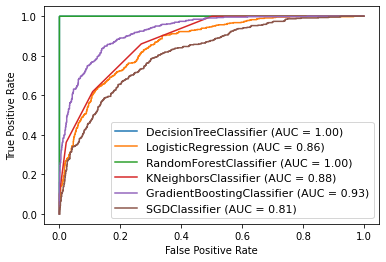

In [270]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [271]:
accuracy =[79.49,71.61,78.66,76.03,79.32,80.10,75.67]
cross_val_score=[80.32,71.86,78.29,76.83,78.41,79.71,73.60]

model=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Gradient','Stochastic']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Logistic Regression,79.49,80.32
1,Decision Tree,71.61,71.86
2,Random Forest,78.66,78.29
3,KNN,76.03,76.83
4,SVM,79.32,78.41
5,Gradient,80.10,79.71
6,Stochastic,75.67,73.60


#### Random Forest Classifier model is our best model because accuracy and CV score is giving least difference value than other models.

## Using GridSearchCV for hyper parameter tuning on best model (Gradient Boosting Classifier)

In [272]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [273]:
grid_search = GridSearchCV(estimator=rand_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [274]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=151),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [275]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 8, 'min_samples_leaf': 19, 'min_samples_split': 2}


In [279]:
rand_clf = RandomForestClassifier(max_depth =8, min_samples_leaf=19, min_samples_split=2)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=19)

In [280]:
rand_clf.score(x_test,y_test)

0.7979677226539151

In [282]:
# After applying hyper parameter tuning accuracy has increased by 1.13%.

## Model Saving

In [283]:
# saving the model to local system
filename = 'Customer Churn Analysis_model.pickle'
pickle.dump(rand_clf,open(filename,'wb'))

In [284]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

## Loading and predicting with the loaded model

In [285]:
# loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [286]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)